In [1]:
import pandas as pd
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Model-specific imports:
from sklearn.linear_model import LinearRegression

In [3]:
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-2.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
2097,2098,12660.7,546.2,13958.9,49435.6,7041.8,2953.1,3845.5,1638.1,1415.8,...,2.316,2.647,4.094,2.383,3.012,2.46018,1009469,1452254.637,66,4
3622,3623,5443.1,184.2,12697.9,52497.5,8281.2,3362.8,4918.9,1994.9,716.1,...,2.632,2.886,3.875,2.327,3.092,2.52828,1155646,1542098.707,28,9
3098,3099,4874.8,297.5,14878.7,56404.7,8169.3,3466.9,4957.3,1643.2,803.0,...,2.629,2.690,3.401,2.348,2.851,2.55273,1123345,1430167.622,23,5
2198,2199,9136.2,359.5,18131.3,68254.9,8420.7,4135.1,5855.0,2313.6,1233.6,...,2.552,2.729,3.905,2.551,3.037,2.44002,1411120,1875875.062,41,4
1934,1935,7765.7,367.0,18037.4,55368.6,8111.6,2988.8,5057.9,1944.8,985.1,...,2.482,2.302,3.532,2.138,2.818,2.30525,1137394,1608553.437,40,4


In [4]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

cor = inputData.corr()
#Correlation with output variable
cor_target = abs(cor["Age"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.6]
relevant_features


Left-Thalamus                        0.696598
3rd-Ventricle                        0.616427
Left-Hippocampus                     0.601390
Left-Amygdala                        0.612836
Left-choroid-plexus                  0.630961
Right-Thalamus                       0.677696
Right-Putamen                        0.620966
Right-Accumbens-area                 0.658007
lhCortexVol                          0.657288
rhCortexVol                          0.656251
CortexVol                            0.658139
SubCortGrayVol                       0.676319
TotalGrayVol                         0.668308
lh_inferiorparietal_thickness        0.629624
lh_parsopercularis_thickness         0.640510
lh_parstriangularis_thickness        0.635172
lh_postcentral_thickness             0.606031
lh_precentral_thickness              0.638825
lh_precuneus_thickness               0.634651
lh_rostralmiddlefrontal_thickness    0.648759
lh_superiorfrontal_thickness         0.695692
lh_superiortemporal_thickness     

In [6]:
# re-initializing data with features that have a score >0.6
inputData = pd.read_excel(r'/Users/meryckmucenski/Desktop/Volumetric_features-newest.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
2787,2788,8585.0,1001.6,3694.2,2042.1,359.6,8702.9,4729.0,586.4,249850.3338,...,2.398,2.651,2.349,2.011,2.367,2.324,2.474,2.478,2.39717,60
3668,3669,8515.2,1010.8,4712.7,1969.2,432.7,7769.5,5049.0,517.9,253223.6897,...,2.485,2.718,2.508,1.933,2.531,2.340,2.678,2.652,2.44870,37
3318,3319,8863.7,1040.0,4341.5,2187.4,484.3,8016.0,5793.4,580.4,261530.7298,...,2.404,2.598,2.542,2.018,2.415,2.381,2.692,2.529,2.44313,51
1702,1703,8842.0,1322.2,4176.1,1756.4,704.7,8040.8,5391.5,539.1,260202.0453,...,2.415,2.394,2.528,1.982,2.370,2.322,2.627,2.459,2.37784,30
734,735,7368.4,1562.4,3673.8,1484.0,881.5,6949.9,3866.9,391.4,224808.9904,...,2.179,2.223,2.093,1.972,2.155,1.991,2.315,2.351,2.16073,73


In [7]:
# select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns= ['Age'])
y = inputData['Age']
# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature 0: 776.863491
Feature 1: 3209.466365
Feature 2: 2058.629404
Feature 3: 1954.839632
Feature 4: 2022.053874
Feature 5: 2208.083280
Feature 6: 2803.281948
Feature 7: 2134.776146
Feature 8: 2563.634858
Feature 9: 2692.905044
Feature 10: 2652.107409
Feature 11: 2690.221059
Feature 12: 2861.429270
Feature 13: 2821.326171
Feature 14: 2206.801645
Feature 15: 2312.804986
Feature 16: 1989.729392
Feature 17: 2272.424023
Feature 18: 2258.304640
Feature 19: 2492.239940
Feature 20: 3212.092057
Feature 21: 2823.889364
Feature 22: 2576.720141
Feature 23: 3275.210678
Feature 24: 2410.199763
Feature 25: 2475.503707
Feature 26: 2996.707734
Feature 27: 1884.912906
Feature 28: 2135.492828
Feature 29: 2330.797106
Feature 30: 2833.203055
Feature 31: 2641.125173
Feature 32: 3302.069352


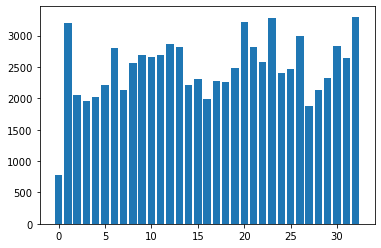

In [8]:
#graphing feature scores (features with larger column are more important)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as pyplot
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    # plot the scores
    
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [9]:
import numpy as np
from sklearn.feature_selection import f_regression

k = 10    # number of best features to obtain

indices = np.argsort(fs.scores_)[::-1]
#printing best features from first to last
print(indices)

[32 23 20  1 26 12 30 21 13  6  9 11 10 31 22  8 19 25 24 29 15 17 18  5
 14 28  7  2  4 16  3 27  0]


In [10]:
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os
inputData.corr()

,S.No,Left-Thalamus,3rd-Ventricle,Left-Hippocampus,Left-Amygdala,Left-choroid-plexus,Right-Thalamus,Right-Putamen,Right-Accumbens-area,lhCortexVol,...,rh_inferiorparietal_thickness,rh_parsopercularis_thickness,rh_parstriangularis_thickness,rh_postcentral_thickness,rh_precentral_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_supramarginal_thickness,rh_MeanThickness_thickness,Age
S.No,1.000000,0.355100,-0.323219,0.370375,0.459095,-0.279971,0.490407,0.373858,0.378544,0.397144,...,0.499675,0.419945,0.435160,0.516816,0.509855,0.464316,0.429315,0.482818,0.551083,-0.448086
Left-Thalamus,0.355100,1.000000,-0.406120,0.742072,0.677330,-0.438474,0.909240,0.672992,0.560422,0.739606,...,0.500260,0.495569,0.498658,0.470322,0.421876,0.460434,0.470515,0.508498,0.520636,-0.696598
3rd-Ventricle,-0.323219,-0.406120,1.000000,-0.331450,-0.336555,0.710784,-0.358931,-0.282654,-0.433445,-0.251124,...,-0.491205,-0.435916,-0.510964,-0.423329,-0.452654,-0.503078,-0.518317,-0.493954,-0.507112,0.616427
Left-Hippocampus,0.370375,0.742072,-0.331450,1.000000,0.782702,-0.368454,0.734812,0.636997,0.593081,0.697834,...,0.447970,0.460208,0.437268,0.463632,0.417402,0.438606,0.430650,0.471767,0.509885,-0.601390
Left-Amygdala,0.459095,0.677330,-0.336555,0.782702,1.000000,-0.354736,0.711494,0.644764,0.611783,0.695496,...,0.480708,0.493964,0.451708,0.474580,0.458792,0.450822,0.457801,0.496701,0.535964,-0.612836
Left-choroid-plexus,-0.279971,-0.438474,0.710784,-0.368454,-0.354736,1.000000,-0.380079,-0.312257,-0.424564,-0.261279,...,-0.501668,-0.424357,-0.492985,-0.437481,-0.445470,-0.478938,-0.516429,-0.503942,-0.514694,0.630961
Right-Thalamus,0.490407,0.909240,-0.358931,0.734812,0.711494,-0.380079,1.000000,0.673963,0.548648,0.766735,...,0.547809,0.532313,0.505537,0.522971,0.475090,0.496320,0.499253,0.550517,0.579179,-0.677696
Right-Putamen,0.373858,0.672992,-0.282654,0.636997,0.644764,-0.312257,0.673963,1.000000,0.668210,0.719127,...,0.463887,0.479452,0.466129,0.444167,0.453377,0.426866,0.463423,0.482041,0.523153,-0.620966
Right-Accumbens-area,0.378544,0.560422,-0.433445,0.593081,0.611783,-0.424564,0.548648,0.668210,1.000000,0.629430,...,0.457280,0.467304,0.478364,0.448640,0.477793,0.431929,0.427612,0.486130,0.519841,-0.658007
lhCortexVol,0.397144,0.739606,-0.251124,0.697834,0.695496,-0.261279,0.766735,0.719127,0.629430,1.000000,...,0.593946,0.606405,0.561880,0.592039,0.561944,0.525942,0.531112,0.606066,0.659920,-0.657288


In [11]:
# instantiate a linear regression model using sklearn:
myLinReg = LinearRegression()

# fit the model to the training data
myLinReg.fit(X_train_fs, y_train)

LinearRegression()

In [12]:
# check the model's performance on unseen, test data
predictions = myLinReg.predict(X_test_fs)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.7672750720289401
mean absolute error (years): 7.488004256995117
mean square error: 89.79142807454171
root mean absolute error (years): 9.475833898636136


/Users/meryckmucenski/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

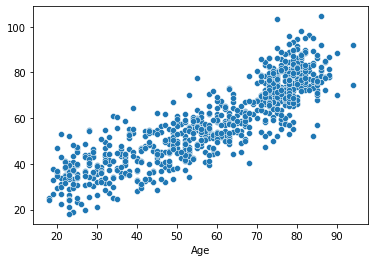

In [13]:
sns.scatterplot(y_test, predictions)

In [ ]:
# fairly linear plot (linear fit would be ok)